# **Import necessary libraries**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical

# **Load and explore MNIST Dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("Training Shape:", x_train.shape, y_train.shape)
print("----------------------------------------")
print("Testing Shape:", x_test.shape, y_test.shape)

Training Shape: (60000, 28, 28) (60000,)

----------------------------------------

Testing Shape: (10000, 28, 28) (10000,)


# **Preprocess the data**

**Normalize pixel values (0-255) to (0-1) --> 0 for better training**

In [ ]:
# Normalize pixel values (0-255) to (0-1) --> 0 for better training
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Min: %.3f, Max: %.3f" % (x_train.min(), x_train.max()))
print("Min: %.3f, Max: %.3f" % (x_test.min(), x_test.max()))

Min: 0.000, Max: 1.000

Min: 0.000, Max: 1.000


**Reshape the data for input to the neural network**

In [ ]:
# Reshape the data for input to the neural network (28x28 pixels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print("Training Shape:", x_train.shape)
print("----------------------------")
print("Testing Shape:", x_test.shape)

Training Shape: (60000, 28, 28, 1)

----------------------------

Testing Shape: (10000, 28, 28, 1)


**Convert the labels from integer format to a one-hot encoded vector**

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# **Split data to train, validation and test data**


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

In [ ]:
print("Training Shape:", x_train.shape, y_train.shape)
print("------------------------------------------")
print("validation Shape:", x_val.shape, y_val.shape)

Training Shape: (48000, 28, 28, 1) (48000, 10)

------------------------------------------

validation Shape: (12000, 28, 28, 1) (12000, 10)


# **Implementing 4 different architectures**

**Architecture 1: Only Dense Layers**

In [ ]:
model_1 = keras.Sequential([
    layers.Flatten(input_shape=(28,28,1)),

    layers.Dense(512, activation='relu', input_shape=(28*28,)),

    layers.Dense(256, activation='relu'),

    layers.Dense(10, activation='softmax')
])

In [ ]:
model_1.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_1.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 flatten (Flatten)           (None, 784)               0         

                                                                 

 dense (Dense)               (None, 512)               401920    

                                                                 

 dense_1 (Dense)             (None, 256)               131328    

                                                                 

 dense_2 (Dense)             (None, 10)                2570      

                                                                 


Total params: 535818 (2.04 MB)

Trainable params: 535818 (2.04 MB)

Non-trainable params: 0 (0.00 Byte)

_________________________________________________________________


In [ ]:
model_1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

Epoch 1/10

1500/1500 [==============================] - 14s 9ms/step - loss: 0.2044 - accuracy: 0.9380 - val_loss: 0.1314 - val_accuracy: 0.9593

Epoch 2/10

1500/1500 [==============================] - 13s 8ms/step - loss: 0.0864 - accuracy: 0.9736 - val_loss: 0.0922 - val_accuracy: 0.9710

Epoch 3/10

1500/1500 [==============================] - 12s 8ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.1144 - val_accuracy: 0.9686

Epoch 4/10

1500/1500 [==============================] - 13s 9ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.1008 - val_accuracy: 0.9707

Epoch 5/10

1500/1500 [==============================] - 13s 9ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0865 - val_accuracy: 0.9750

Epoch 6/10

1500/1500 [==============================] - 13s 9ms/step - loss: 0.0274 - accuracy: 0.9906 - val_loss: 0.0974 - val_accuracy: 0.9779

Epoch 7/10

1500/1500 [==============================] - 12s 8ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.

In [ ]:
test_loss_1, test_accuracy_1 = model_1.evaluate(x_test, y_test)

print("\nAccuracy =", test_accuracy_1, "\n-----------------------------", "\nLoss =", test_loss_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9817



Accuracy = 0.9817000031471252 

----------------------------- 

Loss = 0.0923340916633606


**Architecture 2: Basic CNN**

In [ ]:
model_2 = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dense(10, activation='softmax')
])

In [ ]:
model_2.compile(
    optimizer= 'Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_2.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 26, 26, 32)        320       

                                                                 

 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         

 D)                                                              

                                                                 

 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     

                                                                 

 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         

 g2D)                                                            

                                                                 

 flatten_1 (Flatten)         (None, 1600)              0         

                                                                 

 dense_3 (Dense)             (None, 12

In [ ]:
model_2.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10

1500/1500 [==============================] - 40s 26ms/step - loss: 0.1481 - accuracy: 0.9555 - val_loss: 0.0593 - val_accuracy: 0.9818

Epoch 2/10

1500/1500 [==============================] - 39s 26ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0487 - val_accuracy: 0.9849

Epoch 3/10

1500/1500 [==============================] - 39s 26ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0471 - val_accuracy: 0.9858

Epoch 4/10

1500/1500 [==============================] - 41s 28ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0450 - val_accuracy: 0.9877

Epoch 5/10

1500/1500 [==============================] - 39s 26ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0459 - val_accuracy: 0.9866

Epoch 6/10

1500/1500 [==============================] - 39s 26ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0538 - val_accuracy: 0.9869

Epoch 7/10

1500/1500 [==============================] - 41s 28ms/step - loss: 0.0099 - accuracy: 0.9968 - val_l

In [ ]:
test_loss_2, test_accuracy_2 = model_2.evaluate(x_test, y_test)

print("\nAccuracy =", test_accuracy_2, "\n-----------------------------", "\nLoss =", test_loss_2)

313/313 [==============================] - 3s 8ms/step - loss: 0.0428 - accuracy: 0.9910



Accuracy = 0.9909999966621399 

----------------------------- 

Loss = 0.04280472919344902


**Architecture 3: A deeper CNN with dropout**

In [ ]:
model_3 = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),

    layers.Flatten(),

    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),

    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

In [ ]:
model_3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_3.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       

                                                                 

 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         

 g2D)                                                            

                                                                 

 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     

                                                                 

 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         

 g2D)                                                            

                                                                 

 conv2d_4 (Conv2D)           (None, 3, 3, 128)         73856     

                                                                 

 flatten_2 (Flatten)         (None, 11

In [ ]:
model_3.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10

1500/1500 [==============================] - 47s 30ms/step - loss: 0.2688 - accuracy: 0.9173 - val_loss: 0.0586 - val_accuracy: 0.9807

Epoch 2/10

1500/1500 [==============================] - 47s 32ms/step - loss: 0.0868 - accuracy: 0.9741 - val_loss: 0.0500 - val_accuracy: 0.9856

Epoch 3/10

1500/1500 [==============================] - 44s 29ms/step - loss: 0.0668 - accuracy: 0.9802 - val_loss: 0.0373 - val_accuracy: 0.9891

Epoch 4/10

1500/1500 [==============================] - 45s 30ms/step - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0454 - val_accuracy: 0.9867

Epoch 5/10

1500/1500 [==============================] - 44s 29ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 0.0480 - val_accuracy: 0.9865

Epoch 6/10

1500/1500 [==============================] - 46s 31ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.0522 - val_accuracy: 0.9864

Epoch 7/10

1500/1500 [==============================] - 44s 29ms/step - loss: 0.0371 - accuracy: 0.9894 - val_l

In [ ]:
test_loss_3, test_accuracy_3 = model_3.evaluate(x_test, y_test)

print("\nAccuracy =", test_accuracy_3, "\n-----------------------------", "\nLoss =", test_loss_3)

313/313 [==============================] - 3s 8ms/step - loss: 0.0262 - accuracy: 0.9938



Accuracy = 0.9937999844551086 

----------------------------- 

Loss = 0.026234960183501244


**Architecture 4: Complex CNN with batch normalization**

In [ ]:
model_4 = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),

    layers.BatchNormalization(),

    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.BatchNormalization(),

    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),

    layers.Flatten(),

    layers.Dropout(0.2),             # using 20% dropout instead of 50%

    layers.Dense(128, activation='relu'),

    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax'),
])

In [ ]:
model_4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_4.summary()

Model: "sequential_3"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       

                                                                 

 batch_normalization (Batch  (None, 26, 26, 32)        128       

 Normalization)                                                  

                                                                 

 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         

 g2D)                                                            

                                                                 

 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     

                                                                 

 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       

 chNormalization)                                                

                                      

In [ ]:
model_4.fit(x_train, y_train, batch_size=64, validation_data=(x_val, y_val), epochs=6)

Epoch 1/6

750/750 [==============================] - 58s 76ms/step - loss: 0.1447 - accuracy: 0.9554 - val_loss: 0.0589 - val_accuracy: 0.9827

Epoch 2/6

750/750 [==============================] - 56s 75ms/step - loss: 0.0541 - accuracy: 0.9837 - val_loss: 0.0655 - val_accuracy: 0.9799

Epoch 3/6

750/750 [==============================] - 56s 75ms/step - loss: 0.0444 - accuracy: 0.9870 - val_loss: 0.0494 - val_accuracy: 0.9847

Epoch 4/6

750/750 [==============================] - 57s 76ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0519 - val_accuracy: 0.9856

Epoch 5/6

750/750 [==============================] - 54s 72ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0520 - val_accuracy: 0.9882

Epoch 6/6

750/750 [==============================] - 53s 71ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0460 - val_accuracy: 0.9887


In [ ]:
test_loss_4, test_accuracy_4 = model_4.evaluate(x_test, y_test)

print("\nAccuracy =", test_accuracy_4, "\n-----------------------------", "\nLoss =", test_loss_4)

313/313 [==============================] - 5s 16ms/step - loss: 0.0365 - accuracy: 0.9905



Accuracy = 0.9904999732971191 

----------------------------- 

Loss = 0.03652634471654892


# **Predict Fuction**

In [ ]:
def predict(model, image):

    reshaped_image = image.reshape((1, 28, 28, 1))
    prediction = model.predict(reshaped_image)
    predicted_class = np.argmax(prediction)

    return predicted_class


In [ ]:
predict_image_class = predict(model_1, x_test[0])
print("Predicted Class Label: ", predict_image_class)
print("Actual Class Label of the same image:",(np.argmax(y_test[0])))

1/1 [==============================] - 0s 138ms/step

Predicted Class Label:  7

Actual Class Label of the same image: 7


# **Comparison**

In [ ]:
def compare_models(models, x_test, y_test):
    accuracies = []
    model_names = []

    for model in models:
        _, accuracy = model.evaluate(x_test, y_test)
        accuracies.append(accuracy)

    best_model_index = np.argmax(accuracies)
    best_model = models[best_model_index]
    best_accuracy = accuracies[best_model_index]
    model_names = [f"Model {i+1}" for i in range(len(models))]

    plt.plot(model_names, accuracies, marker='o')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Model Accuracies')
    plt.xticks(rotation=45)
    plt.show()


    print("Comparison Results:")
    for i in range(len(models)):
        print(f"Model {i+1} - Accuracy: { accuracies[i]:.4f}")

    print(f"Best Model : Model {best_model_index+1}")
    print(f"Best Accuracy: {best_accuracy:.4f}")

    return best_model

313/313 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9817

313/313 [==============================] - 2s 7ms/step - loss: 0.0428 - accuracy: 0.9910

313/313 [==============================] - 3s 8ms/step - loss: 0.0262 - accuracy: 0.9938

313/313 [==============================] - 4s 11ms/step - loss: 0.0365 - accuracy: 0.9905


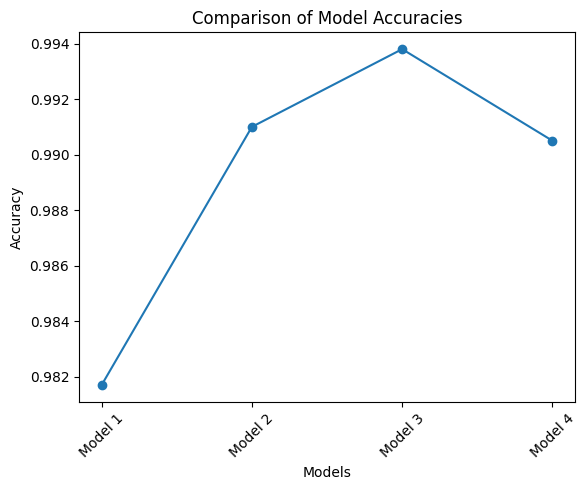

Comparison Results:

Model 1 - Accuracy: 0.9817

Model 2 - Accuracy: 0.9910

Model 3 - Accuracy: 0.9938

Model 4 - Accuracy: 0.9905

Best Model : Model 3

Best Accuracy: 0.9938


In [ ]:
models = [model_1, model_2, model_3, model_4]
best_model = compare_models(models, x_test, y_test)